In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/thesis

/content/drive/My Drive/thesis


In [ ]:
text_file = open("data/kaggle_datasets.txt", "r")
datasets = text_file.read().split('\n')
datasets

['grassknoted/asl-alphabet',
 'kuzivakwashe/significant-asl-sign-language-alphabet-dataset',
 'ahmedkhanak1995/sign-language-gesture-images-dataset',
 'rajarshighoshal/asltestimages',
 'danrasband/asl-alphabet-test',
 'augustohaja/asl-lucas']

In [ ]:
#utils

import random
import pandas as pd

#plots

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  

#ML
from sklearn.model_selection import train_test_split
from fastai.vision import *
from fastai.callbacks.tracker import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("data.csv")
datasets = df.dataset.unique() 
uppercase = [chr(i) for i in range(ord('A'),ord('Z')+1)]

In [ ]:
df = df[df['label'].isin(uppercase)] # очистить набор данных, где классом не является заглавная буква
df = df[~df.path.str.contains('sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data')] # очистить набор данных от неподходящих изображений 

# EDA

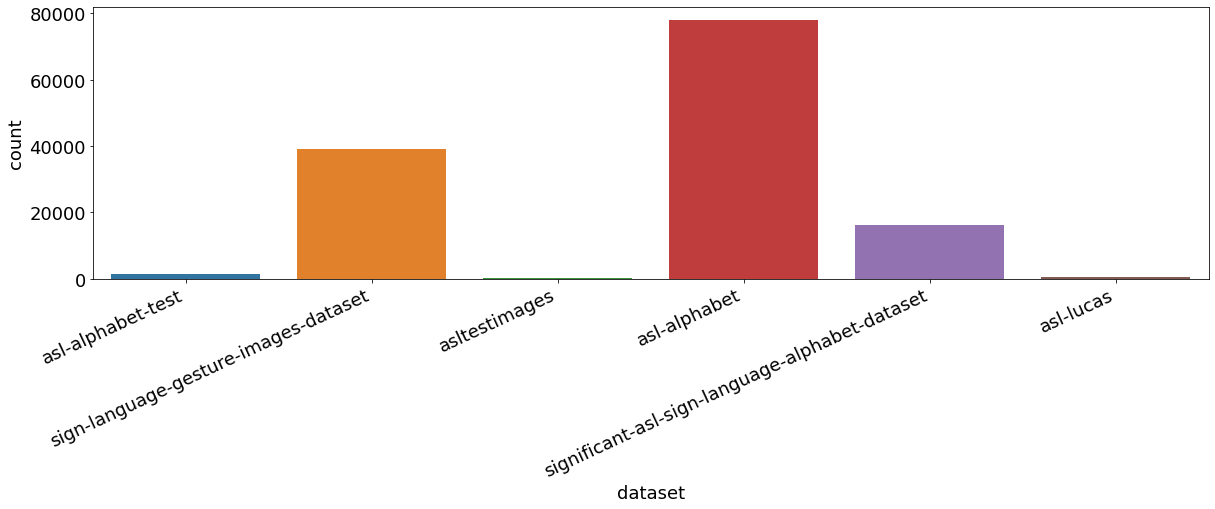

In [ ]:
plt.figure(figsize=(20, 5))
plt.rcParams.update({'font.size': 18})

plt.xticks(
    rotation = 25, 
    horizontalalignment='right',
    fontweight='light', 
)

ax = sns.countplot(x="dataset", data=df)

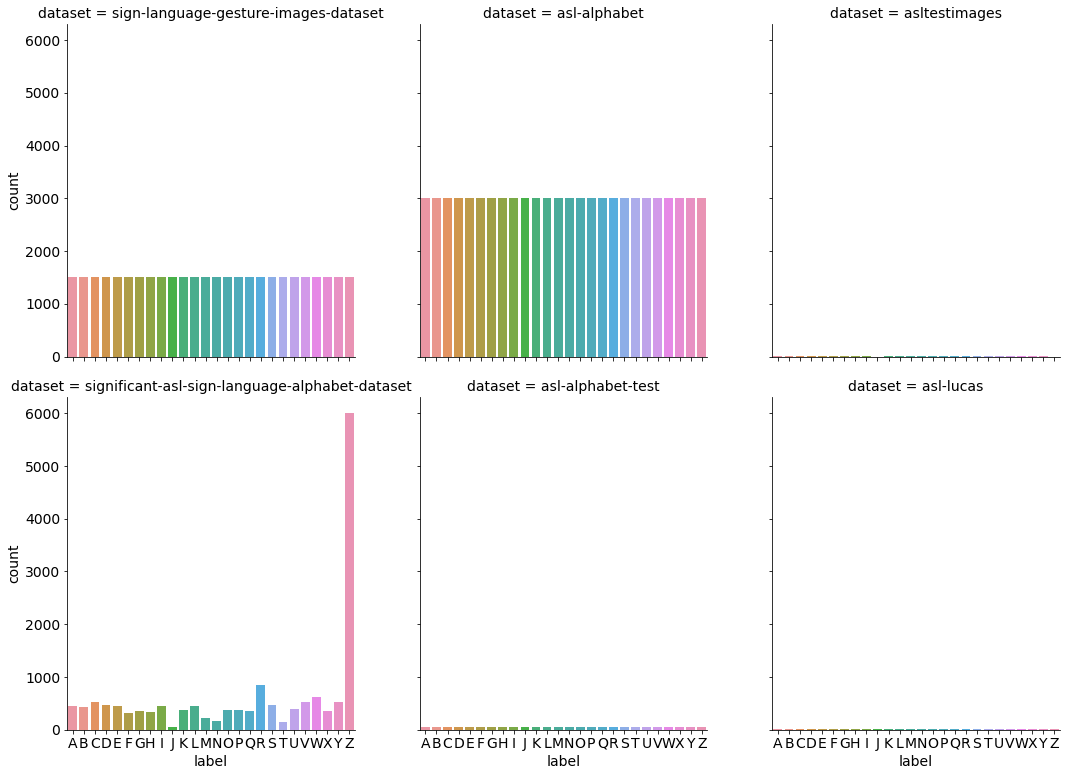

In [ ]:
plt.rcParams.update({'font.size': 14})
ax = sns.catplot(x="label", 
                 data = df[df['label'].isin(uppercase)].sort_values('label'),
                 col = 'dataset', kind = 'count', 
                 aspect = .9, height = 5.5, col_wrap = 3,
                 order = uppercase 
                  )

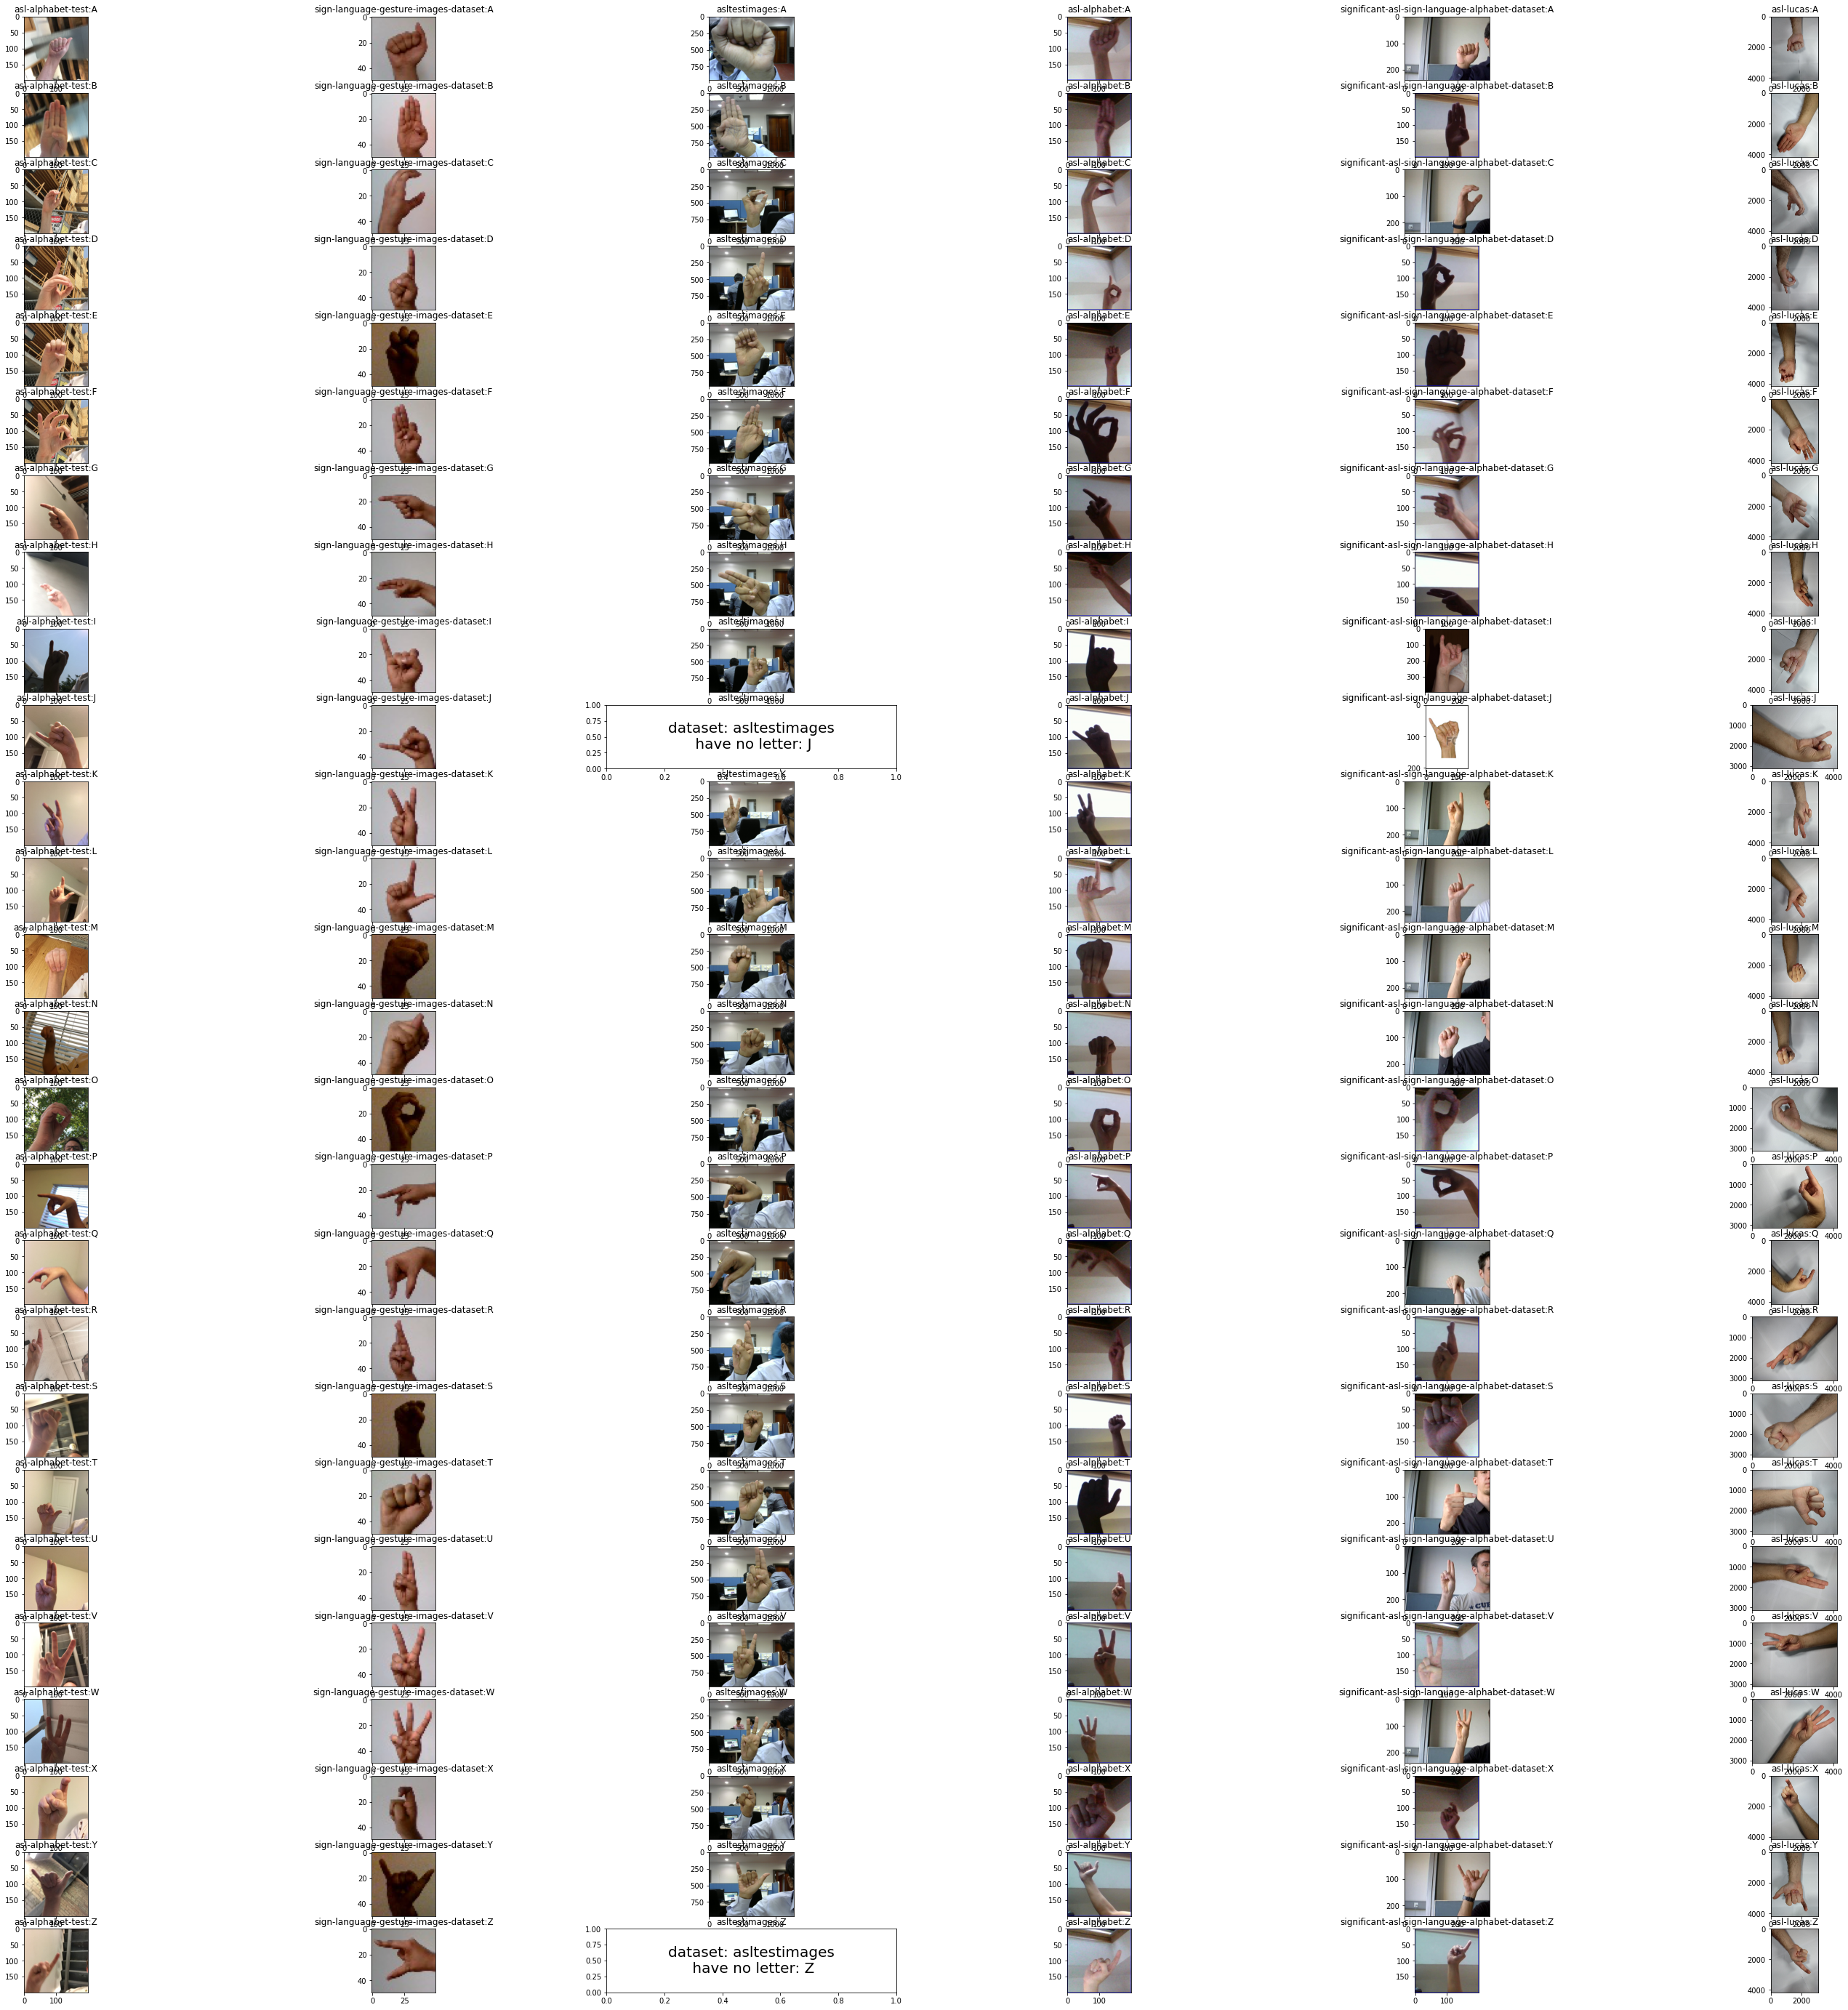

In [8]:
fig = plt.figure(figsize=(50, 50))
element_index = 0
for rows in range(0, len(uppercase)):
    for columns in range(0, datasets.size):
        element_index+=1
        
        fig.add_subplot(26, 6, element_index).set_title(datasets[columns] + ':'+uppercase[rows], loc='center')
        try:
            img = mpimg.imread(random.choice(df.path[(df.dataset == datasets[columns]) & (df.label == uppercase[rows])].values))
            plt.imshow(img)
        except:
            plt.text(0.5, 0.5, s = 'dataset: ' + datasets[columns] + '\n have no letter: ' + uppercase[rows], 
                     ha='center', va='center', size=20)             
plt.show()

In [ ]:
tfms = get_transforms(get_transforms(do_flip=True, 
                                     flip_vert=False, 
                                     max_rotate=10.0, 
                                     max_zoom=1.1, 
                                     max_lighting=0.15, 
                                     max_warp=0.2, 
                                     p_lighting=0.75))

In [ ]:
data_train_val, data_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
data_train_val

,Unnamed: 0,Unnamed: 0.1,path,label,dataset
40553,40553,40558,./data/sign-language-gesture-images-dataset/Ge...,M,sign-language-gesture-images-dataset
150643,150643,150655,./data/asl-alphabet/asl_alphabet_train/asl_alp...,P,asl-alphabet
123143,123143,123152,./data/asl-alphabet/asl_alphabet_train/asl_alp...,Z,asl-alphabet
129075,129075,129084,./data/asl-alphabet/asl_alphabet_train/asl_alp...,N,asl-alphabet
190320,190320,190333,./data/asl-alphabet/asl_alphabet_train/asl_alp...,A,asl-alphabet
...,...,...,...,...,...
191448,191448,191462,./data/asl-alphabet/asl_alphabet_train/asl_alp...,F,asl-alphabet
201059,201059,201105,./data/significant-asl-sign-language-alphabet-...,Z,significant-asl-sign-language-alphabet-dataset
184874,184874,184887,./data/asl-alphabet/asl_alphabet_train/asl_alp...,J,asl-alphabet
216112,216112,216159,./data/significant-asl-sign-language-alphabet-...,B,significant-asl-sign-language-alphabet-dataset


In [ ]:
batch_size = 32

data_train_val = ImageDataBunch.from_df(path = '', df = data_train_val, fn_col = 'path', 
                                        label_col = 'label', size=224, ds_tfms = tfms, bs = batch_size, 
                                        valid_pct=0.25).normalize(imagenet_stats)

data_test  = ImageDataBunch.from_df(path = '', df = data_test, fn_col = 'path', 
                                        label_col = 'label', size=224, bs = batch_size).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 76254
  warn(warn_msg)


You can deactivate this warning by passing `no_check=True`.
You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 5306,5119
  warn(warn_msg)


In [ ]:
data_train_val.show_batch(rows=3, figsize=(12,9))

In [ ]:
learn = cnn_learner(data_train_val, models.resnet18, metrics=error_rate)

In [ ]:
defaults.device = torch.device('cuda')

In [ ]:
learn.load('last_trained_model')


Learner(data=ImageDataBunch;

Train: LabelList (108293 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
O,O,O,O,O
Path: .;

Valid: LabelList (27073 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
M,Y,H,Y,E
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
    

In [ ]:
callbacks = [SaveModelCallback(learn, every='improvement', monitor='valid_loss'), EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)]


In [ ]:
learn.fit_one_cycle(4)

learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.283413,0.100111,0.031729,15:48
1,0.117952,0.038583,0.012300,15:48
2,0.071397,0.019340,0.005725,15:48
3,0.049175,0.015175,0.004580,15:38


In [ ]:
learn.load('stage-1')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.51E-08


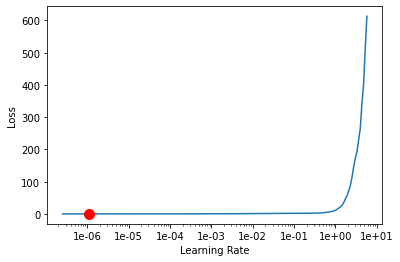

In [ ]:
learn.lr_find(stop_div=False, num_it=200)
learn.recorder.plot(suggestion=True)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(100, max_lr = slice(1.10E-06,1.10E-01), callbacks = callbacks)
learn.save("last_trained_model")

epoch,train_loss,valid_loss,error_rate,time
0,0.028406,0.008396,0.002807,15:54
1,0.025912,0.008411,0.002770,16:14
2,0.039468,0.006117,0.001995,16:11
3,0.036708,0.007516,0.002032,16:01
4,0.041852,0.010089,0.002586,16:00
5,0.054142,0.009783,0.002549,16:18


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multipr

Better model found at epoch 0 with valid_loss value: 0.008395947515964508.


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multipr

Better model found at epoch 2 with valid_loss value: 0.006116517819464207.


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7b83e149e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multipr

Epoch 6: early stopping


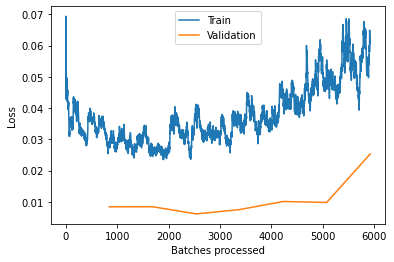

In [ ]:
learn.recorder.plot_losses()

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

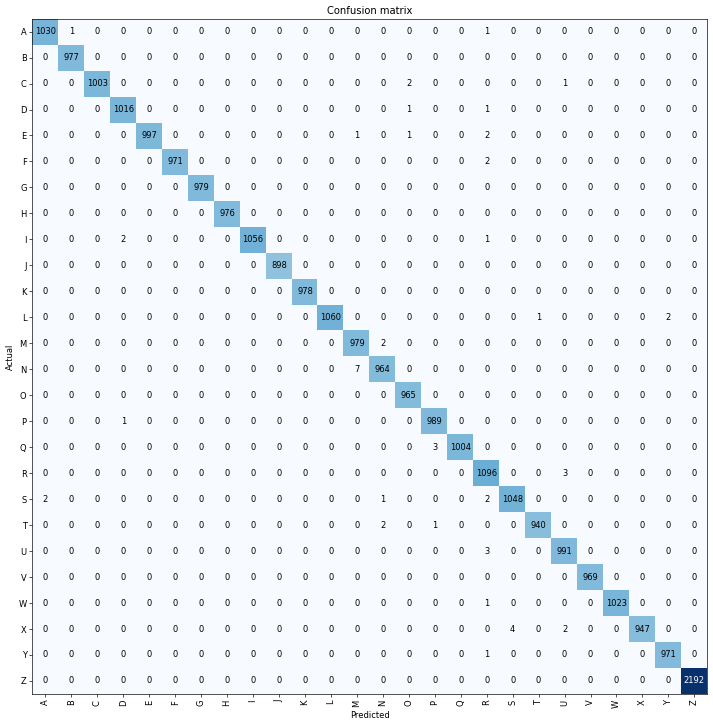

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


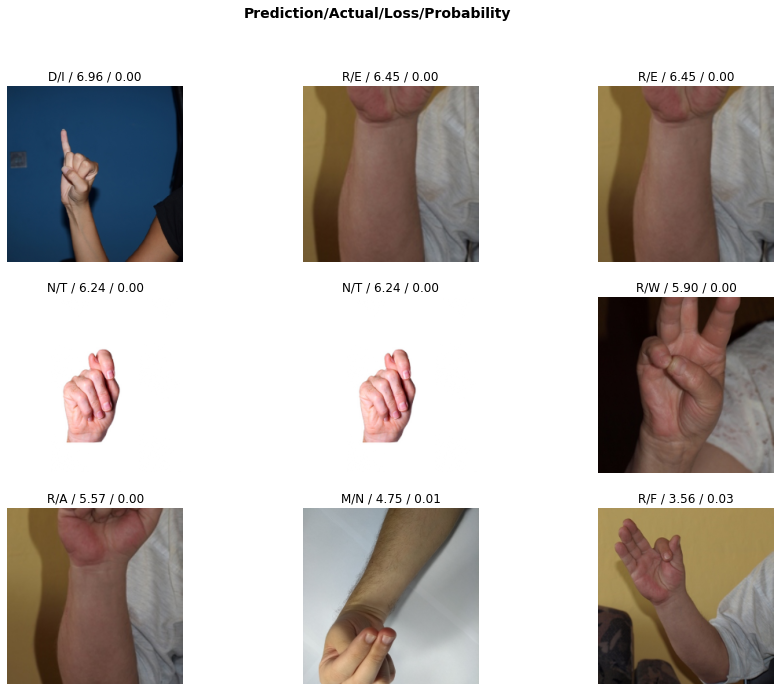

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


# Evaluation

In [10]:
#...

# Preparing model for an android app

In [ ]:
import torch
import torchvision
torch.save(learn.model.state_dict(), "sign-language.h5")


In [ ]:
import torch
loc = torch.load('sign-language.pth')
body = create_body(models.resnet18, True, None)
data_classes = 26
nf = callbacks.hooks.num_features_model(body) * 2
head = create_head(nf, data_classes, None, ps=0.5, bn_final=False)
model = nn.Sequential(body, head)

In [ ]:
model.load_state_dict(loc)

<All keys matched successfully>

In [ ]:
model.eval()
input_tensor = torch.rand(1,3,224,224)
script_model = torch.jit.trace(model,input_tensor)
script_model.save("android_model.pt")